<a href="https://colab.research.google.com/github/ralsouza/Estatistica_Descritiva_R/blob/master/src/07_Exploratory_Analysis/02_Explotatory_Analysis_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. 

Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. **No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).**


Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.
Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [0]:
# Imports
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [2]:
# Carregando o dataset
iris = load_iris()

# Transformar dataset em um pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(len(df))

150


In [0]:
# http://www.jtrive.com/determining-histogram-bin-width-using-the-freedman-diaconis-rule.html

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)

    return(result)

In [4]:
# Check the shape
print(df.shape)

(150, 4)


In [0]:
# Show first rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 1. Extração e Transformação de Dados

In [0]:
# Imprima os nomes das variáveis target (o que queremos prever), 
# 3 possíveis categorias de plantas: setosa, versicolor ou virginica.

# Print target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
# Imprima os valores numéricos da variável target (o que queremos prever), 
# 3 possíveis categorias de plantas: 0, 1 ou 2

# Print target values
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
# pandas.Categorical.from_codes: Make a Categorical type from codes and categories or dtype.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.from_codes.html

df['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)

In [0]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [0]:
# Extraia as features (atributos) do dataset e imprima
features_iris = iris.feature_names
print(features_iris)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
# Calcule a média de cada feature para as 3 classes
df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


# Exploração de Dados

In [0]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
sepal length (cm),5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9
sepal width (cm),3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1
species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa
target,0,0,0,0,0,0,0,0,0,0


In [0]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null category
target               150 non-null int64
dtypes: category(1), float64(4), int64(1)
memory usage: 6.2 KB
None


In [0]:
# Faça um resumo estatístico do dataset
print(df.describe())

       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]


In [0]:
# Verifique se existem valores nulos no dataset
# https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

print(df.isnull().sum(axis=0))

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
target               0
dtype: int64


In [0]:
# Faça uma contagem de valores de sepal length
df['sepal length (cm)'].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal length (cm), dtype: int64

# Plot

In [0]:
nbr_bins = freedman_diaconis(data=df['sepal length (cm)'],returnas='bins')

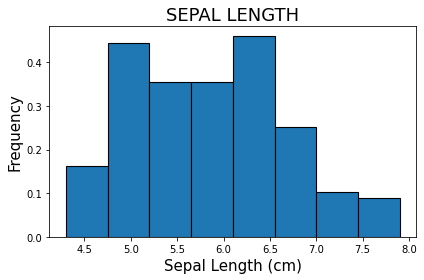

In [37]:
# Crie um Histograma de sepal length
fig, ax = plt.subplots(nrows=1, ncols=1)
# fig.set_size_inches(11,8)
ax.hist(df['sepal length (cm)'],density=True,edgecolor='black',linewidth=1.1,bins=8)
ax.set_title('SEPAL LENGTH',fontsize=18)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_xlabel('Sepal Length (cm)',fontsize=15)
ax.grid(False)
plt.tight_layout()
plt.show()




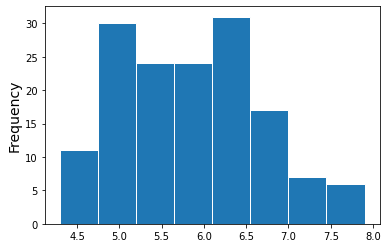

In [45]:
df['sepal length (cm)'].hist(grid=False,edgecolor='white',bins=8)
plt.ylabel('Frequency',fontsize=14)
plt.xlabel('Centimeters')
plt.show()

In [0]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target



In [0]:
# Crie um Scatter Plot de 2 Features (atributos)

In [0]:
# Crie um Scatter Matrix das Features (atributos)

In [0]:
# Crie um Histograma de todas as features